# TF model test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/BTCUSDT-minute-target-dip-features-1.csv')

In [3]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,bb_pband_rate_100,bb_wband_rate_100,bb_pband_1000,bb_wband_1000,bb_pband_rate_1000,bb_wband_rate_1000,fi_100,fi_rate_100,fi_1000,fi_rate_1000
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7.564907e+03,3,0.075183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1.117543e+03,2,0.261074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,5.117185e+01,3,0.012008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,5.999993e+02,1,0.140796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988733,2021-06-03 20:24:00,38665.26,38689.56,38655.91,38682.52,14.795718,1622751899999,5.722516e+05,457,5.929895,...,0.009752,-0.006316,0.491679,3.643182,0.000120,0.000685,6.990163,0.148107,5.188124,-0.000579
1988734,2021-06-03 20:25:00,38682.52,38682.53,38643.07,38649.70,16.778473,1622751959999,6.486770e+05,563,6.614560,...,0.007222,-0.006386,0.467441,3.623688,0.000054,0.000669,6.862080,0.146150,5.122606,-0.000721
1988735,2021-06-03 20:26:00,38649.69,38682.52,38649.69,38682.52,15.709853,1622752019999,6.074695e+05,566,11.004542,...,0.008751,-0.006372,0.490010,3.605175,0.000046,0.000658,6.945564,0.146774,5.180313,-0.000737
1988736,2021-06-03 20:27:00,38682.52,38682.69,38640.40,38649.38,23.010205,1622752079999,8.894626e+05,590,7.261787,...,0.006789,-0.006440,0.465312,3.586621,0.000020,0.000645,6.765000,0.144638,5.088506,-0.000830


In [4]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore', 'nvi',
       'bb', 'target', 'mom_ao_10_log', 'mom_ppo_10_signal_log',
       'mom_ppo_30_hist', 'mom_roc_50_log', 'mom_rsi_30', 'mom_sr_9_signal',
       'mom_srsi_15_k', 'mom_srsi_30', 'mom_srsi_10_d', 'mom_tsi_20_log',
       'mom_wr_50', 'trend_adx_40_neg', 'trend_arn_50', 'trend_cci_70',
       'trend_dpo_100_log', 'trend_kst_sig_log', 'trend_macd_12_signal_log',
       'trend_sma_50_rate_log', 'trend_sma_50_diff_log',
       'trend_sma_200_diff_o_close_log', 'trend_stc_50_2', 'trend_trix_20_log',
       'trend_vi_50_amp', 'volatility_atr_14', 'volatility_atr_o_close',
       'volatility_bb_wband_10', 'volatility_bb_pband_100',
       'volatility_bb_wband_200', 'volatility_bb_hband_o_close',
       'volatility_dc_pband_50', 'volatility_dc_wband_10',
       'volatility_pband_50', 'volatility_wband_20', 'volatility_ui_30',
       'volume_cm

In [89]:
d2=df.copy()

### changing datetime string to number

In [91]:
from datetime import datetime
d2['timems'] = pd.to_datetime(d2['timestamp'])
d2['timems'] = d2['timems'].apply(lambda x: x.value)

In [92]:
d2 = d2.drop('timestamp',axis=1)

In [93]:
d2.dtypes['timems']

dtype('int64')

In [94]:
d2 = d2[np.isfinite(d2).all(1)]

In [97]:
d3 = d2[:-100000].copy()

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = d3.drop(["target", "close", "high", "low"], axis=1).values
y = d3["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
model = Sequential()

model.add(Dense(90,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(60,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=10)

In [104]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1236 - val_loss: 0.1213
Epoch 2/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1216 - val_loss: 0.1212
Epoch 3/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1212 - val_loss: 0.1205
Epoch 4/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1209 - val_loss: 0.1199
Epoch 5/100
5516/5516 [==============================] - 7s 1ms/step - loss: 0.1207 - val_loss: 0.1200
Epoch 6/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1206 - val_loss: 0.1198
Epoch 7/100
5516/5516 [==============================] - 7s 1ms/step - loss: 0.1205 - val_loss: 0.1195
Epoch 8/100
5516/5516 [==============================] - 7s 1ms/step - loss: 0.1204 - val_loss: 0.1199
Epoch 9/100
5516/5516 [==============================] - 8s 1ms/step - loss: 0.1203 - val_loss: 0.1197
Epoch 10/100
5516/5516 [==============================] - 8s 1ms/step - l

In [105]:
model.save('TF-test-model1.h5') 

In [106]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

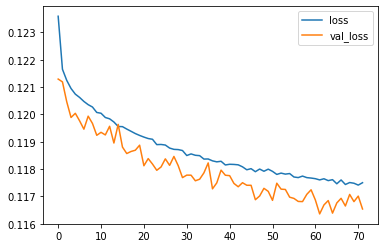

In [107]:
losses[['loss','val_loss']].plot()

In [108]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[307968  11329]
 [ 14090  19577]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96    319297
           1       0.63      0.58      0.61     33667

    accuracy                           0.93    352964
   macro avg       0.79      0.77      0.78    352964
weighted avg       0.93      0.93      0.93    352964



### graphing

In [122]:
d = d2[-100000:-50000]
prediction_values = d.drop(["target", "close", "high", "low"], axis=1).values
prediction_transformed = scaler.transform(prediction_values)

pred = (model.predict(prediction_transformed) > 0.5).astype('int32')

In [123]:
pred = pred.reshape(-1,)

In [124]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [125]:
close = d['close'].copy().reset_index().drop('index',axis=1)
len(close)

50000

In [126]:
close

,close
0,51699.06
1,51692.32
2,51701.44
3,51641.01
4,51638.48
...,...
49995,53519.75
49996,53480.93
49997,53437.70
49998,53478.29


In [127]:
scatter_x = []
scatter_y = []
for i in range(len(pred)):
    if pred[i] == 1:
        scatter_x.append(i)
        scatter_y.append(close.iloc[i])
        
        

In [128]:
max(scatter_x)

49491

In [129]:
# scatter = pd.DataFrame(columns=('i', 'close'))
# for i in range(len(pred)):
#     if pred[i] == 0:
#         scatter.loc[i] = [i, close.loc[i]]

In [130]:
di=d.reset_index()

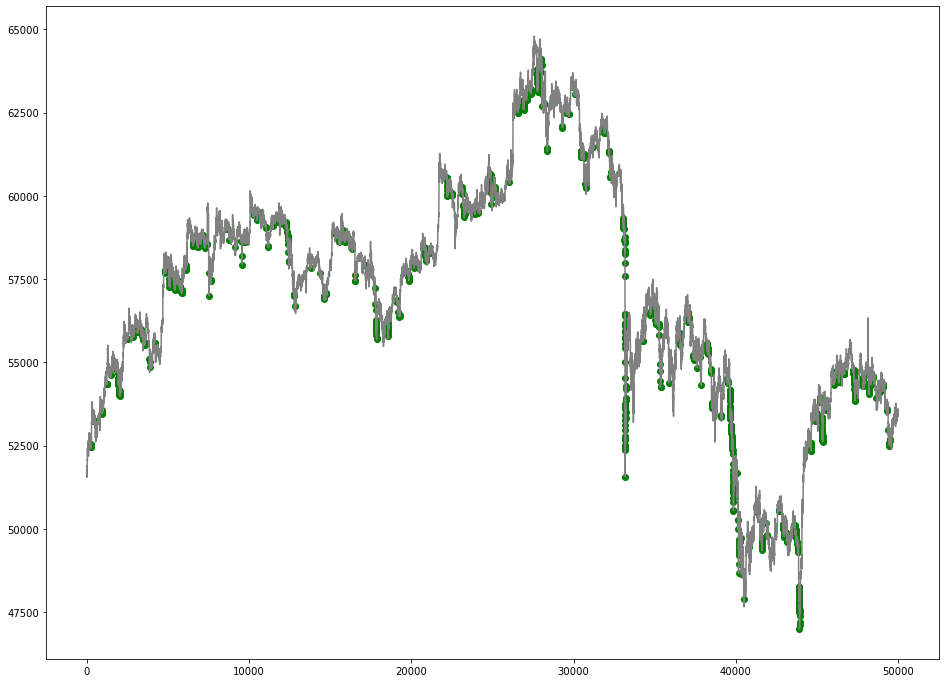

In [131]:
figure = plt.figure(figsize=(16,12))
plt.scatter(scatter_x, scatter_y, color="green")
plt.plot(di.index, di.close, color = 'gray')
